In [48]:
%load_ext line_profiler
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [42]:
points = 1000
length = 8
c1=1
c2=2
d = 0.01

In [43]:
x = np.linspace(-length*np.pi,length*np.pi,points)
left, right = np.split(x,2)

In [44]:
from functools import reduce
def dispersion(k):
    return c1*k
def decay(A,t):
    #return np.e**(-d*t*abs(A))
    return 1
    
def make_wave(k,t):
    if k!=0:
        k1 = k
        o = dispersion(k1)
        k2 = k*(c2/c1)
        R=(k1-k2)/(k2+k1)
        T=(2*k1)/(k2+k1)
    else: 
        k1 = 0
        o = 0
        k2 = 0
        R=0
        T=0
        
    o_wave = decay(1,t)*np.sin(k1*left-o*t)
    r_wave = R*decay(R,t)*np.sin(-k1*left-o*t)
    t_wave = T*decay(T,t)*np.sin(k2*right-o*t)
    return np.concatenate([o_wave+r_wave,t_wave])

def make_composite_wave(a,t):
    z=(j*make_wave(i,t) for i,j in a)
    return reduce(lambda x,y: x+y,z)

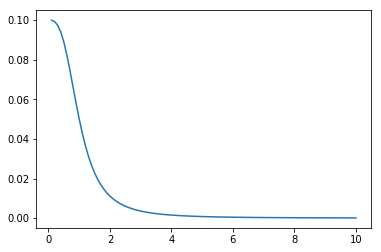

In [45]:
wave = [(i,0.1/(i**3+1)) for i in np.linspace(0.1,10,100)]
plt.plot([i[0] for i in wave], [i[1] for i in wave])

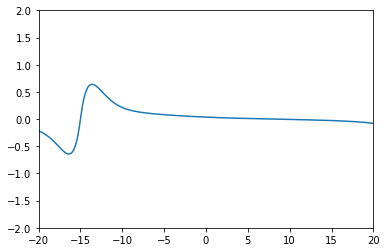

In [53]:
num_frames=600
speed = 0.1
scale = 20
fig1, ax = plt.subplots()
ax.axis([-scale,scale,-2,2])
l, = ax.plot([],[])
offset = 150
def animate(i):
    
    step = speed*(i-offset)
    l.set_data(x,make_composite_wave(wave,step))

ani = animation.FuncAnimation(fig1, animate, frames=num_frames, interval=1000/60)



In [55]:
HTML(ani.to_jshtml())